In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
dateparse = lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

ratings_df = pd.read_csv(   '/content/drive/MyDrive/CSE547_Final_Project/ml-latest-small/ratings.csv', 
                            parse_dates=['timestamp'], 
                            date_parser=dateparse)
movies_df = pd.read_csv('/content/drive/MyDrive/CSE547_Final_Project/ml-latest-small/movies.csv')

In [4]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
genres_unique = pd.DataFrame(movies_df.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [8]:
ratings_df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [9]:
# mr_df = ratings_df.join(other=movies_df, how='inner', on='movieId', rsuffix='_M')
mdf = pd.concat([movies_df.drop('genres', axis=1), movies_df.genres.str.get_dummies(sep='|')], axis=1)

In [10]:
mdf.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
mr_df = ratings_df.join(other=mdf, how='inner', on='movieId', rsuffix='_M')

In [12]:
mr_df

,userId,movieId,rating,timestamp,movieId_M,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,2000-07-30 18:45:03,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
516,5,1,4.0,1996-11-08 06:36:02,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
874,7,1,4.5,2005-01-25 06:52:26,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1434,15,1,2.5,2017-11-13 12:59:30,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1667,17,1,4.5,2011-05-18 05:28:03,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,610,6095,3.5,2016-11-19 08:00:44,42018,Mrs. Henderson Presents (2005),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
100012,610,7202,3.0,2017-05-03 21:56:42,72701,Planet 51 (2009),0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100033,610,7562,2.5,2016-11-19 08:41:05,85414,Source Code (2011),0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
100038,610,7984,4.0,2017-05-28 08:12:49,96728,"Master, The (2012)",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Top 10 most rated movies

In [13]:
common = mr_df.groupby('title').size().sort_values(ascending=False)[:10]
common

title
Age of Innocence, The (1993)                                      329
I Love Trouble (1994)                                             317
Virtuosity (1995)                                                 307
Cemetery Man (Dellamorte Dellamore) (1994)                        279
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)    278
Quiz Show (1994)                                                  251
Terminal Velocity (1994)                                          238
Jupiter's Wife (1994)                                             237
Last Dance (1996)                                                 224
Aristocats, The (1970)                                            220
dtype: int64

Number of movies rated by each genere

Text(0.5, 1.0, 'Movie Generes')

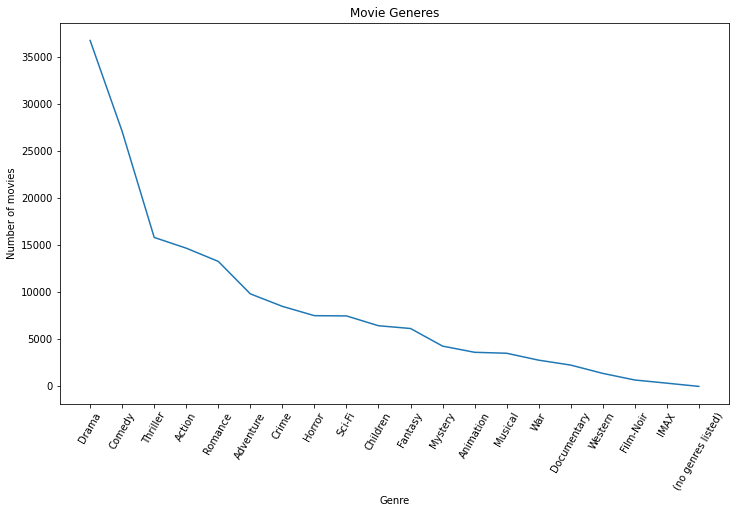

In [20]:
generes_list = genres_unique.genre.tolist()
plt.figure(figsize=(12,7))
plt.plot(mr_df[generes_list].sum().sort_values(ascending=False))
plt.xticks(rotation=60);

plt.xlabel('Genre');
plt.ylabel('Number of movies');
plt.title('Movie Generes')

Ratings vs Time metrics

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Movies rated by year')

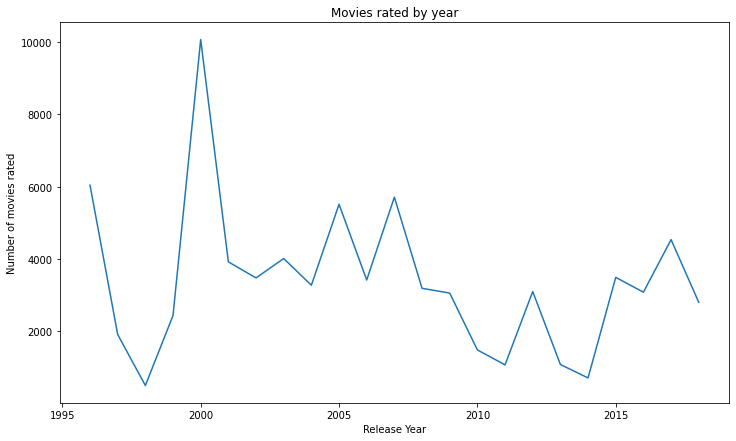

In [22]:
plt.figure(figsize=(12,7))
yearly_release_counts = mr_df.groupby(mr_df.timestamp.dt.year).size().sort_values(ascending=False)
sns.lineplot(yearly_release_counts.index, yearly_release_counts.values);
plt.xlabel('Release Year');
plt.ylabel('Number of movies rated');
plt.title('Movies rated by year')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


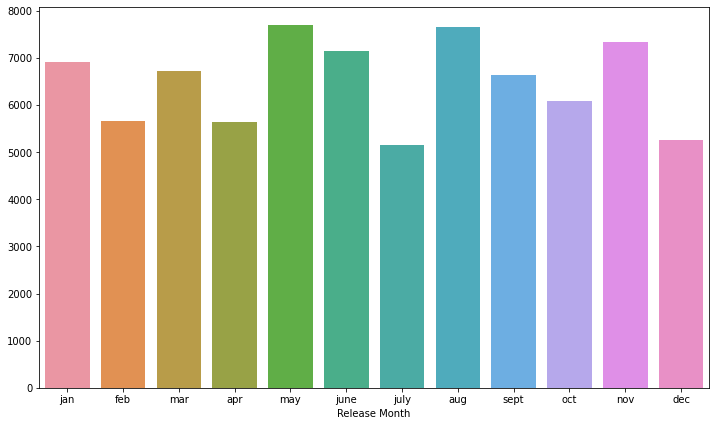

In [16]:
plt.figure(figsize=(12,7))
monthly_release_counts = mr_df[mr_df.timestamp.dt.year > 1990].groupby(mr_df.timestamp.dt.month).size()
sns.barplot(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'], monthly_release_counts.values);
plt.xlabel('Release Month');

Highest and lowest rated movies

In [17]:
mean_ratings = mr_df.groupby(['title'], as_index=False)['rating'].agg(['mean', 'std', 'count'])
mean_ratings[mean_ratings['count'] >= 5].sort_values(by=['mean'], ascending=False)[:10]

,mean,std,count
title,,,
How the Grinch Stole Christmas! (1966),4.900000,0.223607,5
Bats (1999),4.666667,0.516398,6
X2: X-Men United (2003),4.600000,0.547723,5
"Mirror Has Two Faces, The (1996)",4.590909,0.490825,11
Marat/Sade (1966),4.545455,0.650175,11
My Best Friend's Wedding (1997),4.541667,0.541812,12
Stay Tuned (1992),4.500000,0.500000,5
Pirate Radio (2009),4.500000,0.707107,5
"Barefoot Contessa, The (1954)",4.500000,0.774597,6


In [18]:
mean_ratings[mean_ratings['count'] >= 5].sort_values(by=['mean'], ascending=True)[:10]

,mean,std,count
title,,,
Need for Speed (2014),0.800000,0.447214,5
Alice Doesn't Live Here Anymore (1974),1.187500,0.883883,8
Badlands (1973),1.312500,0.842509,8
It Follows (2014),1.333333,0.612372,9
Savior (1998),1.350000,0.944281,10
Solaris (2002),1.400000,0.418330,5
Mr. Jealousy (1997),1.416667,0.491596,6
Cobb (1994),1.444444,0.768295,9
Shrooms (2007),1.500000,1.060660,5
